In [1]:
!pip install scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 45.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [2]:
!pip install -U imbalanced-learn

In [3]:
#Import all needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from scikeras.wrappers import KerasClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Read the dataset
df_bank = pd.read_csv('bank-additional-full.csv',delimiter=';', quotechar='"')
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
#Dimension of Dataset
df_bank.shape

(41188, 21)

In [6]:
#Checking the columns information
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
#Checking the null value
df_bank.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [8]:
#Statistical Description of dataset
df_bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
#Checking the duplicates
df_bank.duplicated().sum()

12

In [10]:
#Drop the duplicates
df_bank = df_bank.drop_duplicates()

In [11]:
#Checking the Dimension of dataset after removing the duplicates
df_bank.shape

(41176, 21)

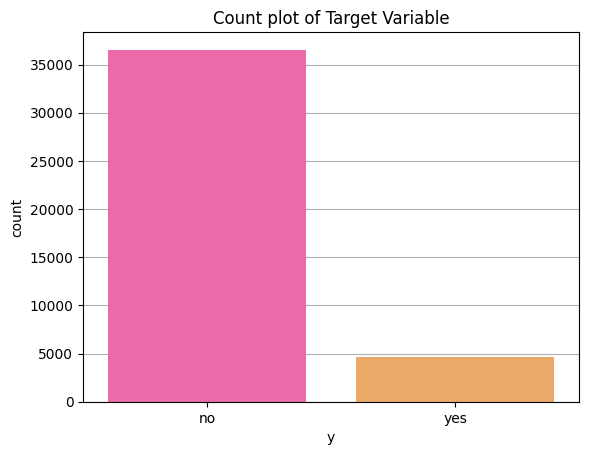

In [12]:
# Count plot of target variable
plt.grid(True)
plt.gca().set_axisbelow(True)
sns.countplot(x='y', data=df_bank, palette='spring' )
plt.title('Count plot of Target Variable')
plt.show()

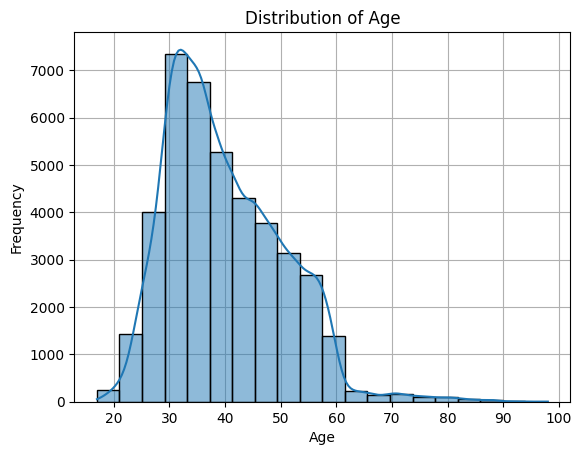

In [13]:
# Distribution of age
plt.grid(True)
plt.gca().set_axisbelow(True)
sns.histplot(df_bank['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

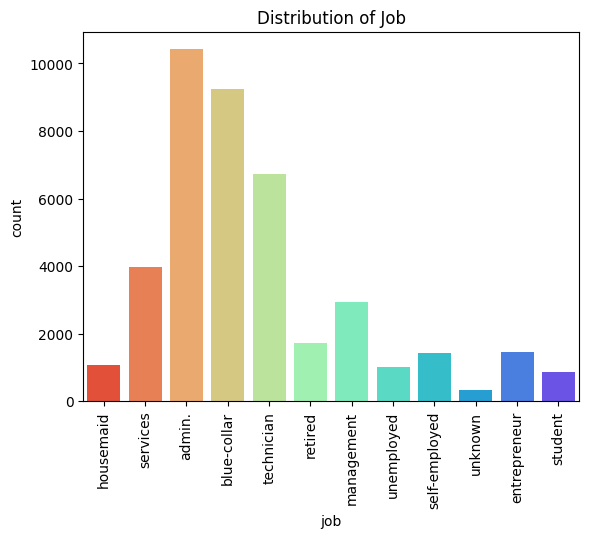

In [14]:
# Count plot of job
sns.countplot(x='job', data=df_bank, palette='rainbow_r')
plt.title('Distribution of Job')
plt.xticks(rotation=90)
plt.show()

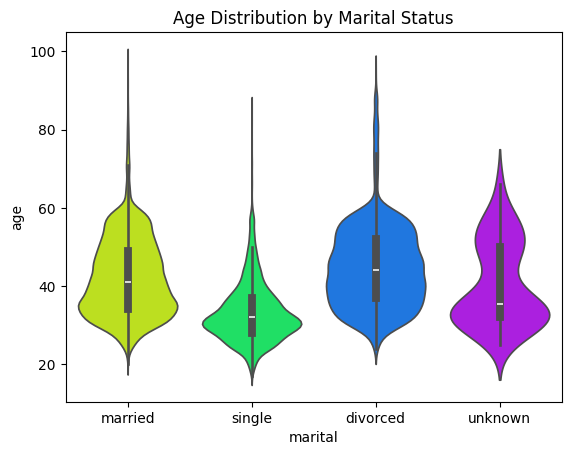

In [15]:
# Violinplot of age vs. marital status
sns.violinplot(x='marital', y='age', data=df_bank, palette='hsv')
plt.title('Age Distribution by Marital Status')
plt.show()

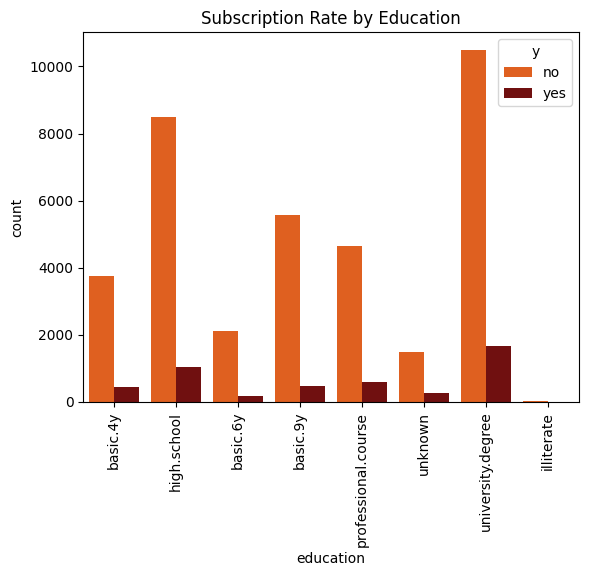

In [16]:
# Count plot for education using y
sns.countplot(x='education', hue='y', data=df_bank, palette='gist_heat_r')
plt.xticks(rotation=90)
plt.title('Subscription Rate by Education')
plt.show()

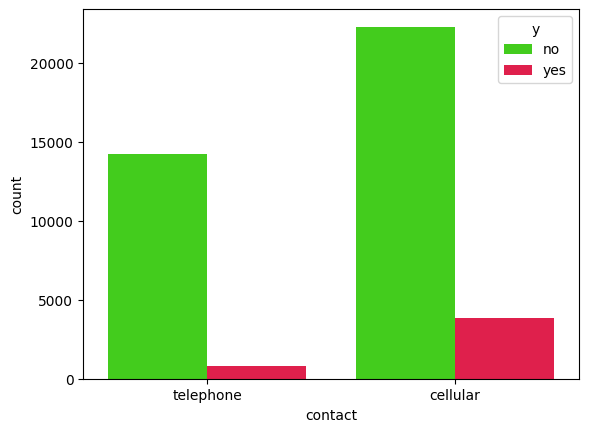

In [17]:
# Count plot for contact using y
sns.countplot(x='contact', hue ='y', data=df_bank, palette='prism')
plt.show()

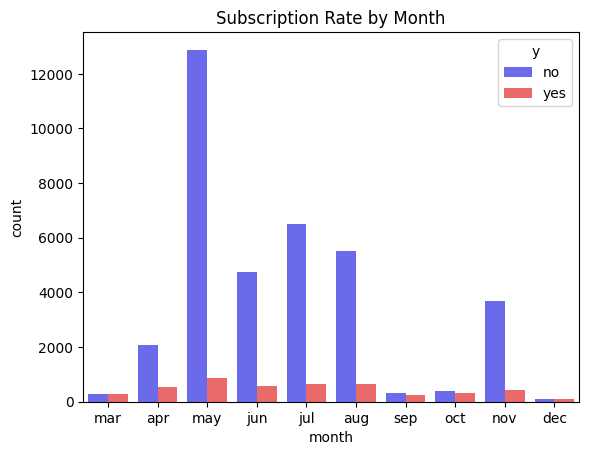

In [18]:
# Countplot for month using y
sns.countplot(x='month', hue='y', data=df_bank, order=['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette='seismic')
plt.title('Subscription Rate by Month')
plt.show()

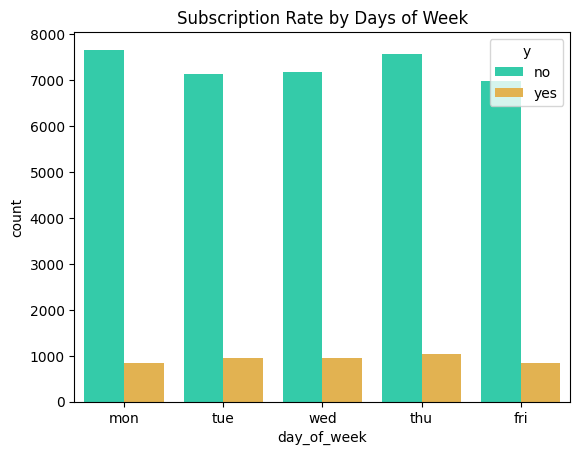

In [19]:
# Count plot for day of week
sns.countplot(x='day_of_week', hue='y', data=df_bank, order=['mon', 'tue', 'wed', 'thu', 'fri'], palette='turbo')
plt.title('Subscription Rate by Days of Week')
plt.show()

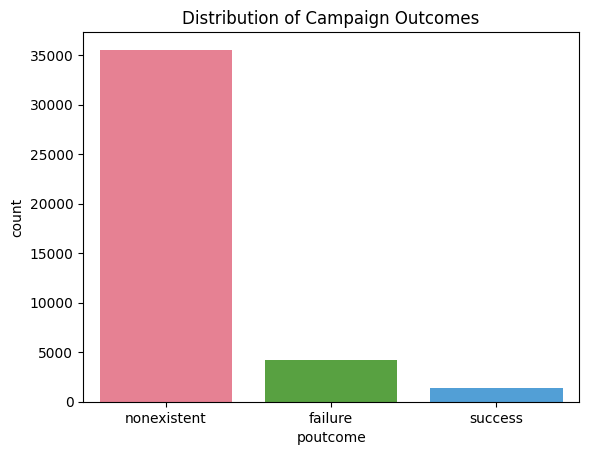

In [20]:
# Distribution of previous outcomes
sns.countplot(x='poutcome', data=df_bank, palette='husl')
plt.title('Distribution of Campaign Outcomes')
plt.show()

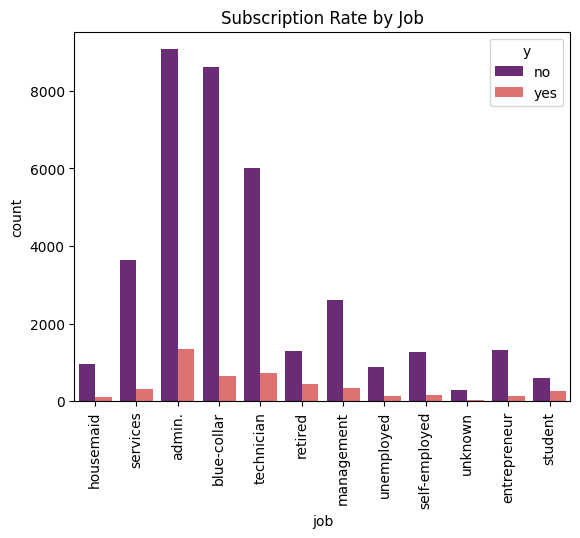

In [22]:
# countplot for job using y
sns.countplot(x='job', hue ='y', data=df_bank, palette='magma')
plt.title('Subscription Rate by Job')
plt.xticks(rotation=90)
plt.show()

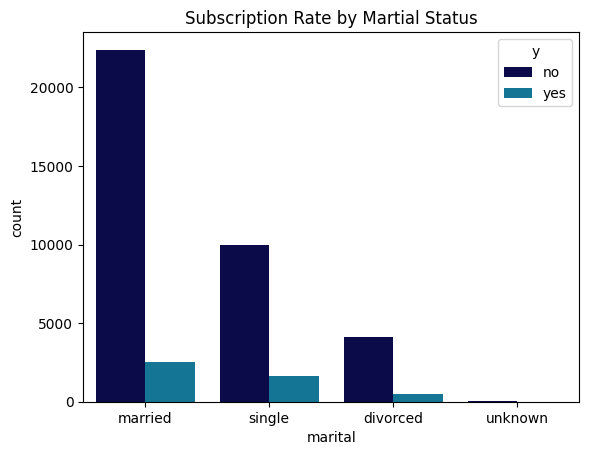

In [23]:
# Countplot for marital status using y
sns.countplot(x='marital', hue='y', data=df_bank, palette='ocean')
plt.title('Subscription Rate by Martial Status')
plt.show()

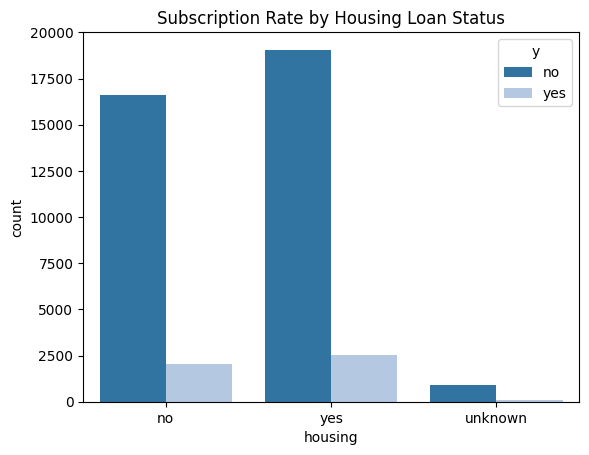

In [24]:
# Countplot for housing loan status using y
sns.countplot(x='housing', hue='y', data=df_bank, palette='tab20')
plt.title('Subscription Rate by Housing Loan Status')
plt.show()

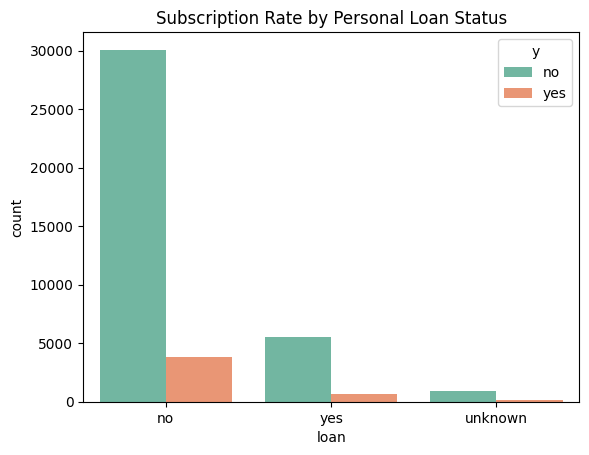

In [25]:
# Subscription rate by personal loan status
sns.countplot(x='loan', hue='y', data=df_bank, palette='Set2')
plt.title('Subscription Rate by Personal Loan Status')
plt.show()

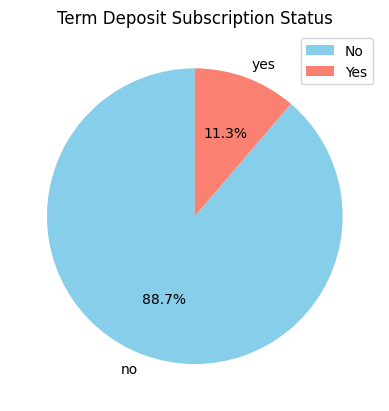

In [26]:
# Pie chart for target variable (whether a client subscribed to a term deposit or not)
df_bank['y'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Term Deposit Subscription Status')
plt.ylabel('')
plt.legend(labels=['No', 'Yes'], loc='upper right')
plt.show()

In [27]:
le = LabelEncoder()
# Apply LabelEncoder to each categorical column separately
df_bank['job'] = le.fit_transform(df_bank['job'])
df_bank['marital'] = le.fit_transform(df_bank['marital'])
df_bank['education'] = le.fit_transform(df_bank['education'])
df_bank['default'] = le.fit_transform(df_bank['default'])
df_bank['housing'] = le.fit_transform(df_bank['housing'])
df_bank['loan'] = le.fit_transform(df_bank['loan'])
df_bank['contact'] = le.fit_transform(df_bank['contact'])
df_bank['month'] = le.fit_transform(df_bank['month'])
df_bank['day_of_week'] = le.fit_transform(df_bank['day_of_week'])
df_bank['poutcome'] = le.fit_transform(df_bank['poutcome'])
df_bank['y'] = le.fit_transform(df_bank['y'])

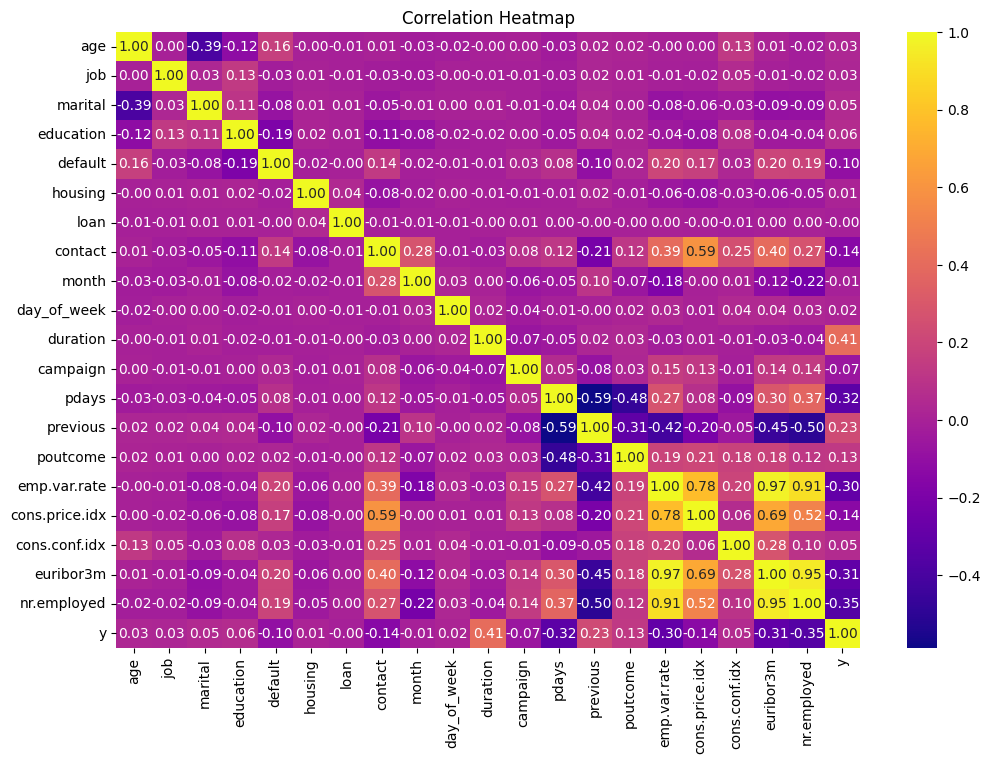

In [28]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_bank.corr(), annot=True, cmap='plasma', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [29]:
#Checking data type information of dataset
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  int64  
 2   marital         41176 non-null  int64  
 3   education       41176 non-null  int64  
 4   default         41176 non-null  int64  
 5   housing         41176 non-null  int64  
 6   loan            41176 non-null  int64  
 7   contact         41176 non-null  int64  
 8   month           41176 non-null  int64  
 9   day_of_week     41176 non-null  int64  
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  int64  
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [30]:
# Separating dependent and independent variable of dataset
x = df_bank.drop(['y'], axis=1)
y = df_bank['y']

In [31]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


In [32]:
#  Train-validation split (75% train, 25% validation from the 80% train set)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train) # 0.25 * 0.8 = 0.2


In [33]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [34]:
# Apply MinMaxScaler to scale features
scaler = MinMaxScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [35]:
# Output the shapes of the resulting datasets
print("Training set shape (X):", X_train_smote_scaled.shape)
print("Training set shape (y):", y_train_smote.shape)
print("Testing set shape (X):", X_test_scaled.shape)
print("Testing set shape (y):", y_test.shape)

Training set shape (X): (43844, 20)
Training set shape (y): (43844,)
Testing set shape (X): (8236, 20)
Testing set shape (y): (8236,)


Best parameters found by GridSearchCV:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Validation Set Evaluation:
Validation Accuracy: 0.8857
Validation Precision: 0.4937
Validation Recall: 0.5517
Validation F1 Score: 0.5211


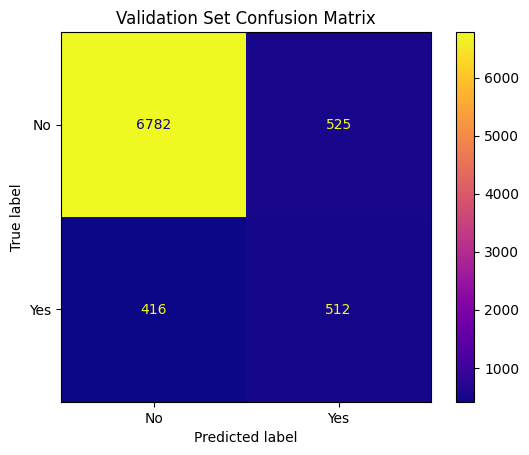

Accuracy: 0.8843
Precision: 0.4888
Recall: 0.5862
F1 Score: 0.5331


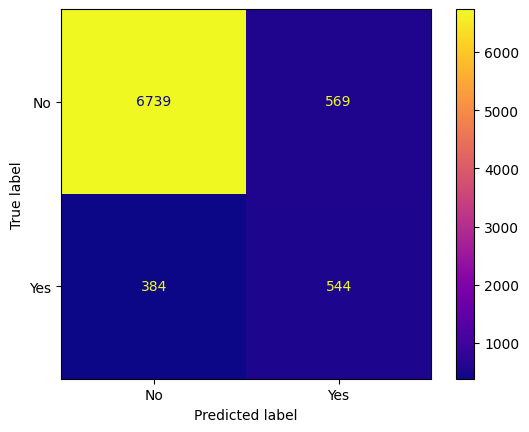

In [36]:
# Initialize Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1,2],
    'criterion': ['gini', 'entropy']
}

# Perform hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_smote_scaled, y_train_smote)

# Get the best estimator
best_dt = grid_search.best_estimator_

# Print the best parameters
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Predict on the test set
y_pred = best_dt.predict(X_test_scaled)
y_val_pred = best_dt.predict(X_val_scaled)

# Evaluate the model
val_accuracy_dt = accuracy_score(y_val, y_val_pred)
val_precision_dt = precision_score(y_val, y_val_pred, average='binary', pos_label=1)
val_recall_dt = recall_score(y_val, y_val_pred, average='binary', pos_label=1)
val_f1_dt = f1_score(y_val, y_val_pred, average='binary', pos_label=1)
val_cm_dt = confusion_matrix(y_val, y_val_pred)

print("Validation Set Evaluation:")
print(f"Validation Accuracy: {val_accuracy_dt:.4f}")
print(f"Validation Precision: {val_precision_dt:.4f}")
print(f"Validation Recall: {val_recall_dt:.4f}")
print(f"Validation F1 Score: {val_f1_dt:.4f}")

# Display confusion matrix for validation set
disp = ConfusionMatrixDisplay(confusion_matrix=val_cm_dt, display_labels=['No', 'Yes'])
disp.plot(cmap='plasma')
plt.title("Validation Set Confusion Matrix")
plt.show()

dt_accuracy_test = accuracy_score(y_test, y_pred)
dt_precision = precision_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_f1 = f1_score(y_test, y_pred)
dt_cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {dt_accuracy_test:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"F1 Score: {dt_f1:.4f}")

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=['No', 'Yes'])
disp.plot(cmap='plasma')
plt.show()

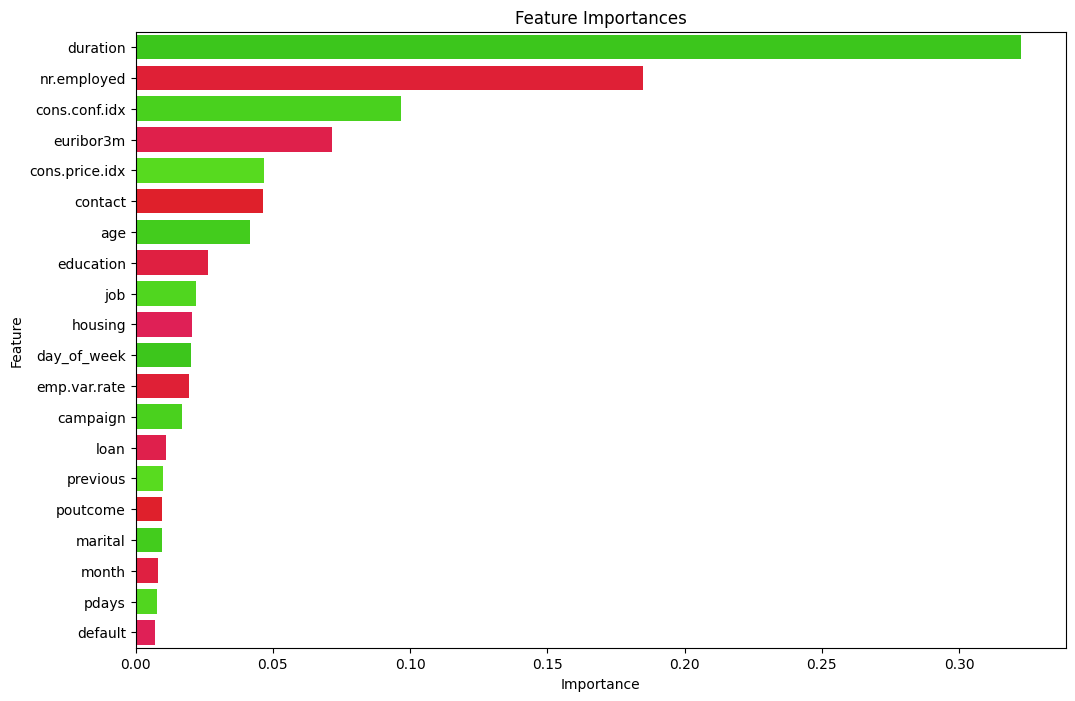

In [37]:
# Feature importance
feature_importances = best_dt.feature_importances_
features = x.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the dataframe by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='prism')
plt.title('Feature Importances')
plt.show()

Best parameters found by GridSearchCV:
{'max_depth': None, 'n_estimators': 100}
Validation Set Evaluation:
Validation Accuracy: 0.9061
Validation Precision: 0.5761
Validation Recall: 0.6325
Validation F1 Score: 0.6030


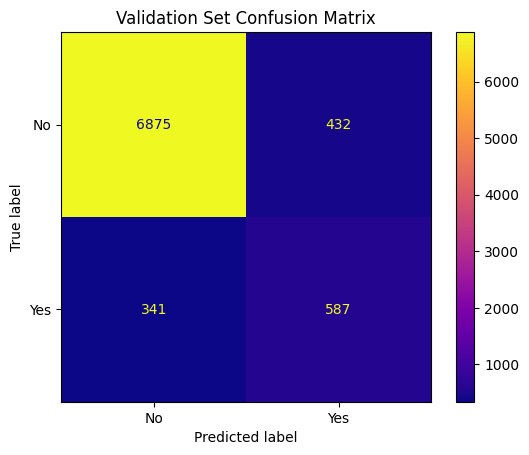

Accuracy: 0.9071
Precision: 0.5797
Recall: 0.6390
F1 Score: 0.6079


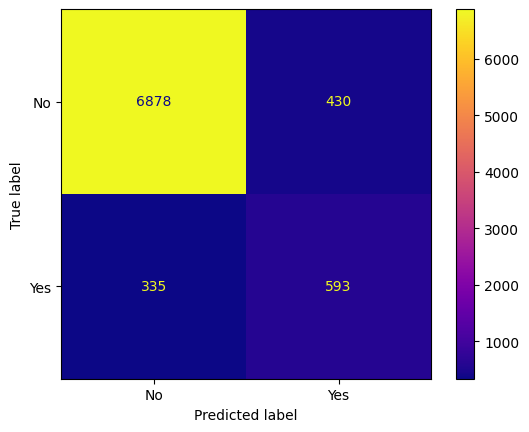

In [38]:
# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}

# Perform hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_smote_scaled, y_train_smote)

# Get the best estimator
best_rf = grid_search.best_estimator_

# Print the best parameters
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Predict on the test set
y_pred = best_rf.predict(X_test_scaled)
y_val_pred = best_rf.predict(X_val_scaled)

# model Evalustion
val_accuracy_rf = accuracy_score(y_val, y_val_pred)
val_precision_rf = precision_score(y_val, y_val_pred, average='binary', pos_label=1)
val_recall_rf = recall_score(y_val, y_val_pred, average='binary', pos_label=1)
val_f1_rf = f1_score(y_val, y_val_pred, average='binary', pos_label=1)
val_cm_rf = confusion_matrix(y_val, y_val_pred)

print("Validation Set Evaluation:")
print(f"Validation Accuracy: {val_accuracy_rf:.4f}")
print(f"Validation Precision: {val_precision_rf:.4f}")
print(f"Validation Recall: {val_recall_rf:.4f}")
print(f"Validation F1 Score: {val_f1_rf:.4f}")

# Confusion matrix for validation set
disp = ConfusionMatrixDisplay(confusion_matrix=val_cm_rf, display_labels=['No', 'Yes'])
disp.plot(cmap='plasma')
plt.title("Validation Set Confusion Matrix")
plt.show()

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
rf_cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1 Score: {rf_f1:.4f}")

# confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=['No', 'Yes'])
disp.plot(cmap='plasma')
plt.show()

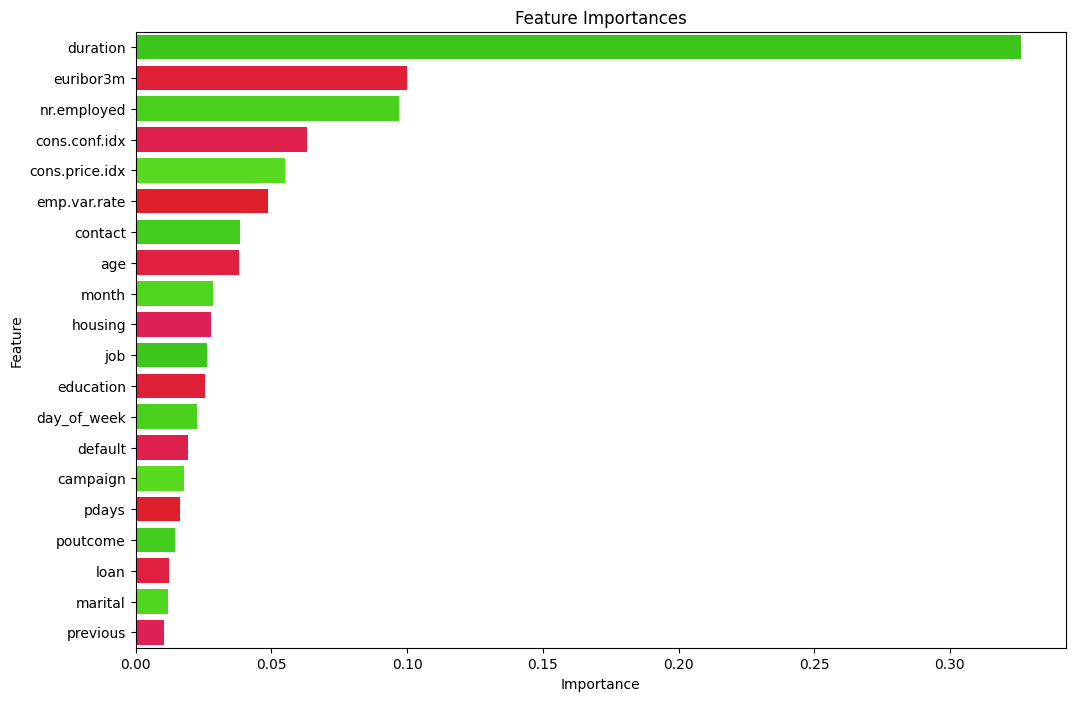

In [39]:
# Feature importance
feature_importances = best_rf.feature_importances_
features = x.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the dataframe by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='prism')
plt.title('Feature Importances')
plt.show()

Best parameters found by GridSearchCV:
{'learning_rate': 0.1, 'n_estimators': 200}
Validation Set Evaluation:
Validation Accuracy: 0.8964
Validation Precision: 0.5291
Validation Recall: 0.7349
Validation F1 Score: 0.6152


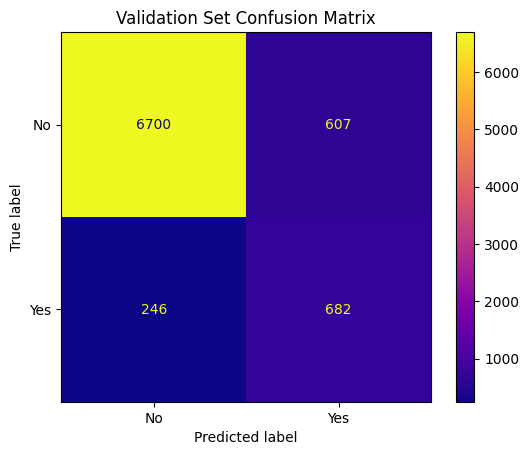

Accuracy: 0.9003
Precision: 0.5407
Recall: 0.7651
F1 Score: 0.6336


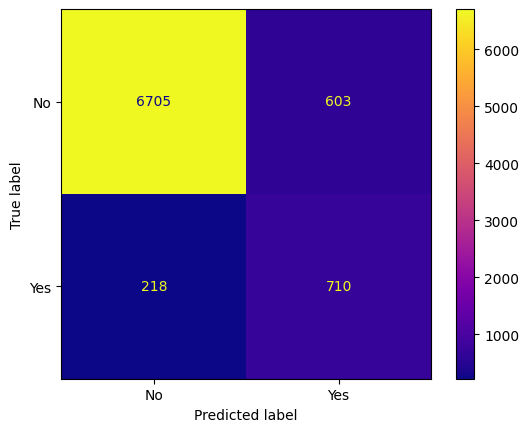

In [40]:
# Initialize Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42)

# Parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1]
}

# Perform hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_smote_scaled, y_train_smote)

# Get the best estimator
best_gb = grid_search.best_estimator_

# Print the best parameters
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Predict on the test set
y_pred = best_gb.predict(X_test_scaled)
y_val_pred = best_gb.predict(X_val_scaled)

# Model Evaluation
val_accuracy_gb = accuracy_score(y_val, y_val_pred)
val_precision_gb = precision_score(y_val, y_val_pred, average='binary', pos_label=1)
val_recall_gb = recall_score(y_val, y_val_pred, average='binary', pos_label=1)
val_f1_gb = f1_score(y_val, y_val_pred, average='binary', pos_label=1)
val_cm_gb = confusion_matrix(y_val, y_val_pred)

print("Validation Set Evaluation:")
print(f"Validation Accuracy: {val_accuracy_gb:.4f}")
print(f"Validation Precision: {val_precision_gb:.4f}")
print(f"Validation Recall: {val_recall_gb:.4f}")
print(f"Validation F1 Score: {val_f1_gb:.4f}")

# confusion matrix for validation set
disp = ConfusionMatrixDisplay(confusion_matrix=val_cm_gb, display_labels=['No', 'Yes'])
disp.plot(cmap='plasma')
plt.title("Validation Set Confusion Matrix")
plt.show()

# Evaluate the model
gb_accuracy = accuracy_score(y_test, y_pred)
gb_precision = precision_score(y_test, y_pred)
gb_recall = recall_score(y_test, y_pred)
gb_f1 = f1_score(y_test, y_pred)
gb_cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {gb_accuracy:.4f}")
print(f"Precision: {gb_precision:.4f}")
print(f"Recall: {gb_recall:.4f}")
print(f"F1 Score: {gb_f1:.4f}")

# confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=gb_cm, display_labels=['No', 'Yes'])
disp.plot(cmap='plasma')
plt.show()

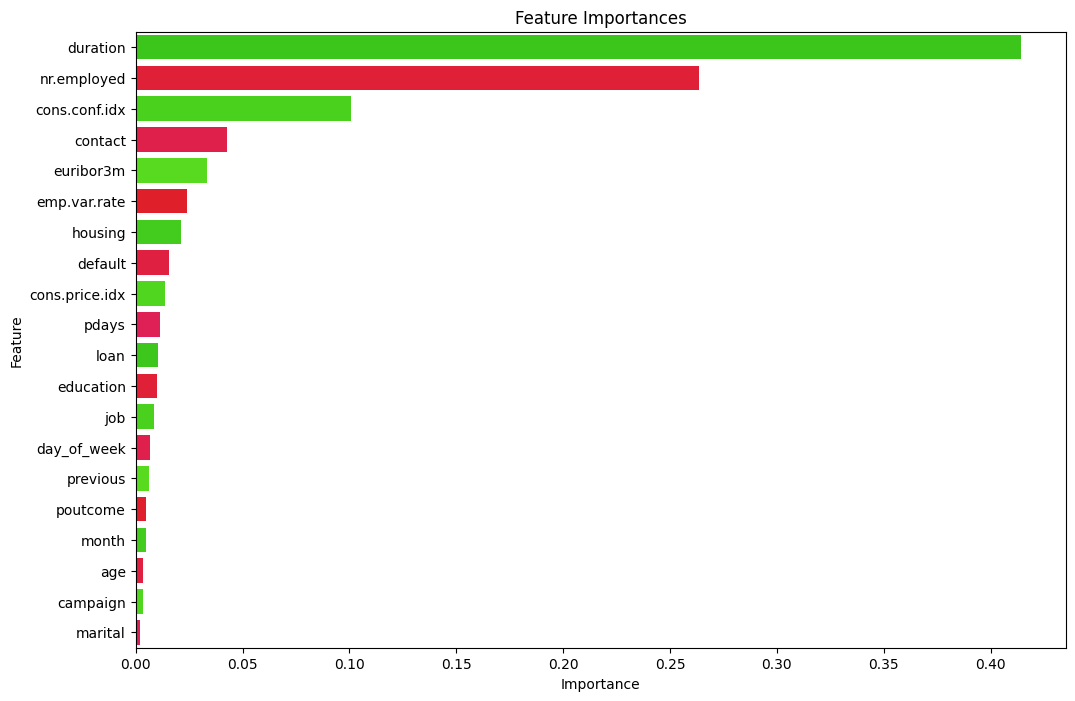

In [41]:
# Feature importance
feature_importances = best_gb.feature_importances_
features = x.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the dataframe by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='prism')
plt.title('Feature Importances')
plt.show()

Best parameters found by GridSearchCV:
{'activation': 'tanh', 'hidden_layer_sizes': (100,)}
Validation Set Evaluation:
Validation Accuracy: 0.8952
Validation Precision: 0.5270
Validation Recall: 0.6832
Validation F1 Score: 0.5950


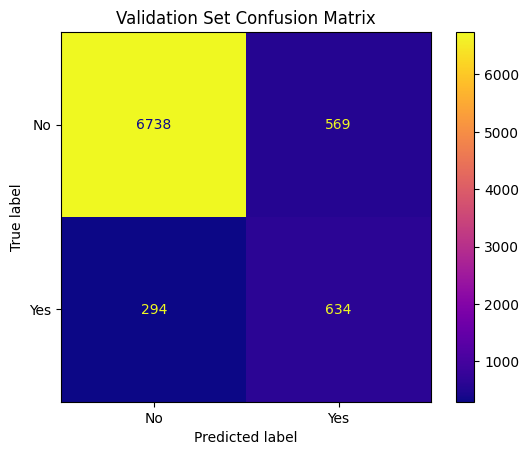

Accuracy: 0.8951
Precision: 0.5263
Recall: 0.6897
F1 Score: 0.5970


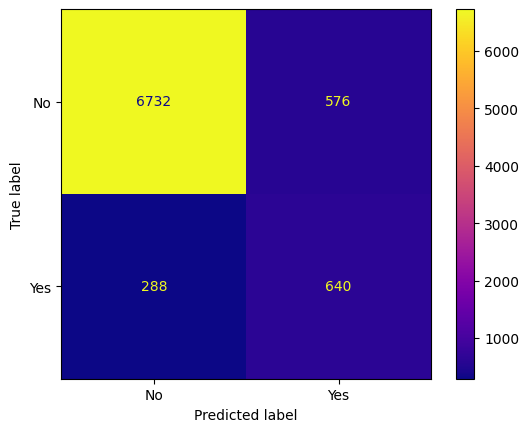

In [42]:
# Initialize MLP model
mlp = MLPClassifier(random_state=42, max_iter=500)

# Parameter grid for hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['tanh', 'relu']
}

# Perform hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_smote_scaled, y_train_smote)

# Get the best estimator
best_mlp = grid_search.best_estimator_

# Print the best parameters
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Predict on the test set
y_pred = best_mlp.predict(X_test_scaled)
y_val_pred = best_mlp.predict(X_val_scaled)

# Model Evaluation
val_accuracy_mlp = accuracy_score(y_val, y_val_pred)
val_precision_mlp = precision_score(y_val, y_val_pred, average='binary', pos_label=1)
val_recall_mlp = recall_score(y_val, y_val_pred, average='binary', pos_label=1)
val_f1_mlp = f1_score(y_val, y_val_pred, average='binary', pos_label=1)
val_cm_mlp = confusion_matrix(y_val, y_val_pred)

print("Validation Set Evaluation:")
print(f"Validation Accuracy: {val_accuracy_mlp:.4f}")
print(f"Validation Precision: {val_precision_mlp:.4f}")
print(f"Validation Recall: {val_recall_mlp:.4f}")
print(f"Validation F1 Score: {val_f1_mlp:.4f}")

# confusion matrix for validation set
disp = ConfusionMatrixDisplay(confusion_matrix=val_cm_mlp, display_labels=['No', 'Yes'])
disp.plot(cmap='plasma')
plt.title("Validation Set Confusion Matrix")
plt.show()

# Evaluate the model
mlp_accuracy = accuracy_score(y_test, y_pred)
mlp_precision = precision_score(y_test, y_pred)
mlp_recall = recall_score(y_test, y_pred)
mlp_f1 = f1_score(y_test, y_pred)
mlp_cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {mlp_accuracy:.4f}")
print(f"Precision: {mlp_precision:.4f}")
print(f"Recall: {mlp_recall:.4f}")
print(f"F1 Score: {mlp_f1:.4f}")

#  confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=mlp_cm, display_labels=['No', 'Yes'])
disp.plot(cmap='plasma')
plt.show()

Best parameters found by GridSearchCV:
{'model__activation': 'relu', 'model__learning_rate': 0.01, 'model__optimizer': 'adam', 'model__units': 100}
Validation Set Evaluation:
Validation Accuracy: 0.8814
Validation Precision: 0.4831
Validation Recall: 0.7554
Validation F1 Score: 0.5893


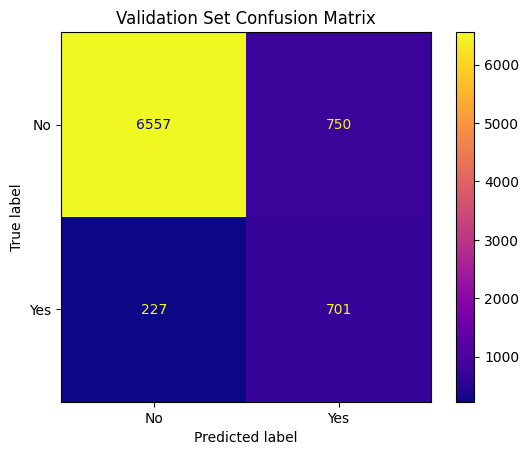

Accuracy: 0.8782
Precision: 0.4750
Recall: 0.7683
F1 Score: 0.5871


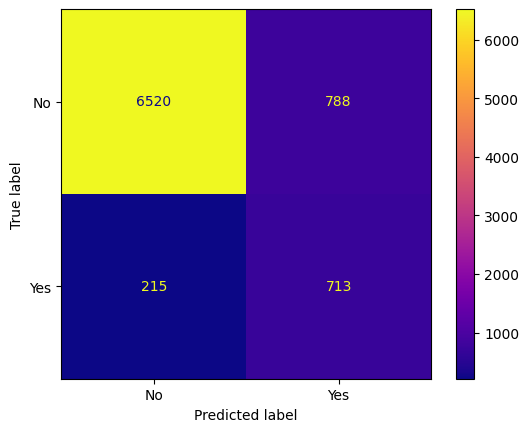

In [43]:
# Reshape data for RNN
X_train_smote_scaled = X_train_smote_scaled.reshape(X_train_smote_scaled.shape[0], 1, X_train_smote_scaled.shape[1])
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])
X_val_scaled = X_val_scaled.reshape(X_val_scaled.shape[0], 1, X_val_scaled.shape[1])

# Define a function to create the RNN model
def create_rnn_model(units=50, activation='relu', optimizer='adam', learning_rate=0.001):
    model = Sequential()
    model.add(SimpleRNN(units=units, activation=activation, input_shape=(1, X_train_smote_scaled.shape[2])))
    model.add(Dense(1, activation='sigmoid'))

    if optimizer == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model using KerasClassifier
rnn_model = KerasClassifier(model=create_rnn_model, verbose=0)

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'model__units': [50, 100],
    'model__activation': ['tanh', 'relu'],
    'model__optimizer': ['adam', 'sgd'],
    'model__learning_rate': [0.001, 0.01]
}

# Perform hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(estimator=rnn_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_smote_scaled, y_train_smote)

# Get the best estimator
best_rnn = grid_search.best_estimator_

# Print the best parameters
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Predict on the validation set
y_val_pred_prob = best_rnn.predict(X_val_scaled)
y_val_pred = (y_val_pred_prob > 0.5).astype("int32")

# Model Evaluation
val_accuracy_rnn = accuracy_score(y_val, y_val_pred)
val_precision_rnn = precision_score(y_val, y_val_pred)
val_recall_rnn = recall_score(y_val, y_val_pred)
val_f1_rnn = f1_score(y_val, y_val_pred)
val_cm_rnn = confusion_matrix(y_val, y_val_pred)

print("Validation Set Evaluation:")
print(f"Validation Accuracy: {val_accuracy_rnn:.4f}")
print(f"Validation Precision: {val_precision_rnn:.4f}")
print(f"Validation Recall: {val_recall_rnn:.4f}")
print(f"Validation F1 Score: {val_f1_rnn:.4f}")

# Confusion matrix for validation set
disp = ConfusionMatrixDisplay(confusion_matrix=val_cm_rnn, display_labels=['No', 'Yes'])
disp.plot(cmap='plasma')
plt.title("Validation Set Confusion Matrix")
plt.show()

# Predict on the test set
y_pred_prob = best_rnn.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

#  confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='plasma')
plt.show()

In [44]:
# Create a dictionary
metrics_dict = {
    'Model': ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'MLP', 'RNN'],
    'Validation Accuracy': [val_accuracy_dt, val_accuracy_rf, val_accuracy_gb, val_accuracy_mlp, val_accuracy_rnn],
    'Validation Precision': [val_precision_dt, val_precision_rf, val_precision_gb, val_precision_mlp, val_precision_rnn],
    'Validation Recall': [val_recall_dt, val_recall_rf, val_recall_gb, val_recall_mlp, val_recall_rnn],
    'Validation F1 Score': [val_f1_dt, val_f1_rf, val_f1_gb, val_f1_mlp, val_f1_rnn],
    'Accuracy': [dt_accuracy_test, rf_accuracy, gb_accuracy, mlp_accuracy, accuracy],
    'Precision': [dt_precision, rf_precision, gb_precision, mlp_precision, precision],
    'Recall': [dt_recall, rf_recall, gb_recall, mlp_recall, recall],
    'F1 Score': [dt_f1, rf_f1, gb_f1, mlp_f1, f1],
    'Confusion Matrix': [dt_cm, rf_cm, gb_cm, mlp_cm, cm]
}

# Convert the dictionary into a DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Display the comparison table
print(metrics_df.to_string())

               Model  Validation Accuracy  Validation Precision  Validation Recall  Validation F1 Score  Accuracy  Precision    Recall  F1 Score           Confusion Matrix
0      Decision Tree             0.885732              0.493732           0.551724             0.521120  0.884288   0.488769  0.586207  0.533072  [[6739, 569], [384, 544]]
1      Random Forest             0.906132              0.576055           0.632543             0.602979  0.907115   0.579668  0.639009  0.607893  [[6878, 430], [335, 593]]
2  Gradient Boosting             0.896418              0.529092           0.734914             0.615246  0.900316   0.540746  0.765086  0.633646  [[6705, 603], [218, 710]]
3                MLP             0.895203              0.527016           0.683190             0.595026  0.895095   0.526316  0.689655  0.597015  [[6732, 576], [288, 640]]
4                RNN             0.881360              0.483115           0.755388             0.589323  0.878218   0.475017  0.768319  0.58

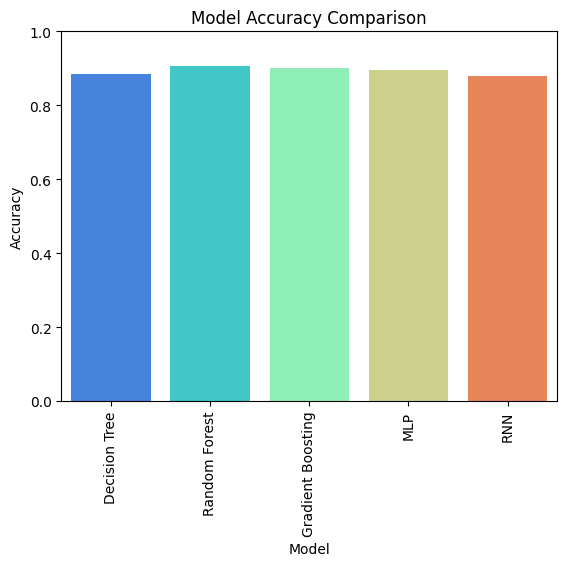

In [45]:
# Plot Accuracy
sns.barplot(x='Model', y='Accuracy', data=metrics_df, palette='rainbow')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1.0)
plt.xticks(rotation=90)
plt.show()

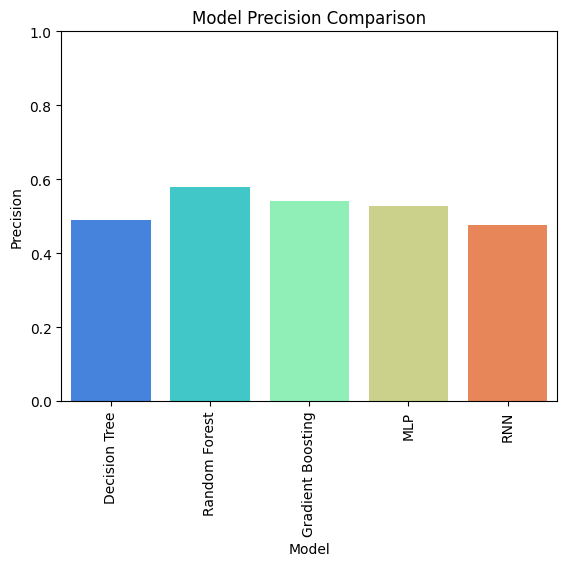

In [46]:
# Plot Precision
sns.barplot(x='Model', y='Precision', data=metrics_df, palette='rainbow')
plt.title('Model Precision Comparison')
plt.xticks(rotation=90)
plt.ylim(0, 1.0)
plt.show()

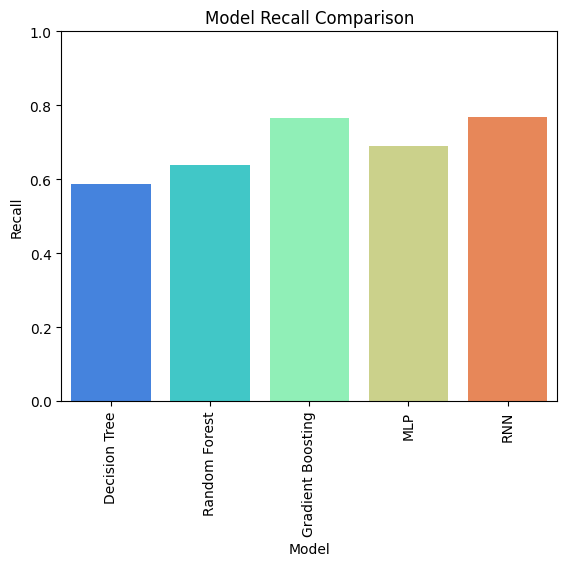

In [47]:
# Plot Recall
sns.barplot(x='Model', y='Recall', data=metrics_df, palette='rainbow')
plt.title('Model Recall Comparison')
plt.xticks(rotation=90)
plt.ylim(0, 1.0)
plt.show()

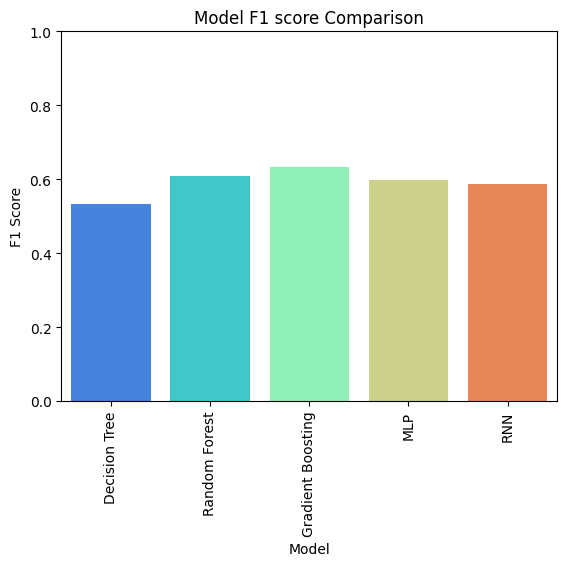

In [48]:
# Plot F1 score
sns.barplot(x='Model', y='F1 Score', data=metrics_df, palette='rainbow')
plt.title('Model F1 score Comparison')
plt.xticks(rotation=90)
plt.ylim(0, 1.0)
plt.show()